In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_url = 'http://bit.ly/w-data'
data = pd.read_csv(data_url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info() #checking for null values or any missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [7]:
data.shape

(25, 2)

In [8]:
data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
data.rename(columns = {'Hours':'hrs','Scores':'scores'},inplace=True)
data.columns

Index(['hrs', 'scores'], dtype='object')

In [11]:
#importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

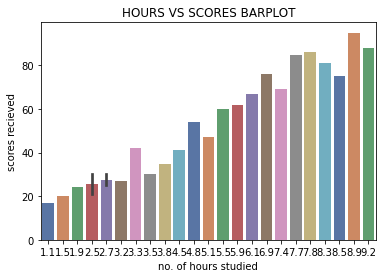

In [12]:
#Creating bar plot
sns.barplot(x = 'hrs',y = 'scores',data = data, palette = "deep")
plt.title('HOURS VS SCORES BARPLOT')
plt.xlabel('no. of hours studied')
plt.ylabel('scores recieved') 
plt.show()

In [13]:
#preparing the data
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [14]:
#Splitting the data into training data and test data with the help of built-in Scikit-learn method train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [15]:
#Training The Algorithm
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('Model Trained Successfully')

Model Trained Successfully


In [16]:
# plot regression line with the help of coefficient and intercept
lr_model.coef_, lr_model.intercept_

(array([9.91065648]), 2.018160041434683)

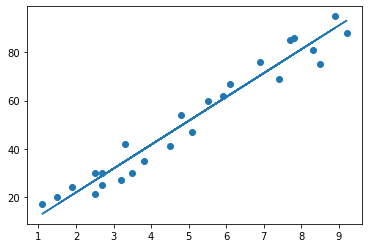

In [17]:
#Plotting line
line = lr_model.coef_*X + lr_model.intercept_

plt.scatter(X, y)
plt.plot(X, line)
plt.show()

In [19]:
#we can observe from above graph the train data is having positive linear relation so it is now time to predict values

In [20]:
#Predicting Values and Comparing the Model
predictions = lr_model.predict(X_test)
print('Values Predicted')

Values Predicted


In [21]:
data_frame = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': predictions})
data_frame

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
arr = np.array([9.25])
hour_studied = arr.reshape(-1,1)
pred_score = lr_model.predict(hour_studied)

In [23]:
print('If a student studied 9.25 hrs/day the score would be :',pred_score[0])

If a student studied 9.25 hrs/day the score would be : 93.69173248737538


In [24]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error for our trained algorithm is: ',mean_absolute_error(y_test, predictions))

Mean Absolute Error for our trained algorithm is:  4.183859899002975
